Density-Based Clustering is an unsupervised learning method where clusters are formed based on the density of data points in a region — instead of assuming fixed shapes (like K-Means’ spherical clusters).

eps → Maximum distance between two points to be considered neighbors.

min_samples → Minimum number of points required to form a dense region.

Types of Points:

Core point: Has at least min_samples points within distance eps.

Border point: Not a core point, but within eps of a core point.

Noise point: Neither core nor border



In [ ]:
import sklearn
print(sklearn.__version__)



1.6.1


In [ ]:
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt

# Example usage
import numpy as np
x=np.array([[1,2],[3,4],[4,3],[8,7],[7,8],[25,80]])


In [ ]:
x

array([[ 1,  2],
       [ 3,  4],
       [ 4,  3],
       [ 8,  7],
       [ 7,  8],
       [25, 80]])

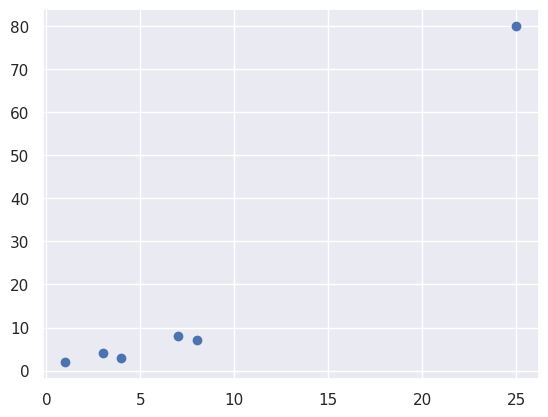

In [ ]:
plt.scatter(x[:,0],x[:,1])

In [ ]:
clustering=DBSCAN(eps=3,min_samples=2).fit_predict(x)

In [ ]:
clustering

array([ 0,  0,  0,  1,  1, -1])

In [ ]:
len(set(clustering))

3

In [ ]:
from sklearn.cluster import KMeans

# Create the KMeans model
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit the model
kmeans.fit(x)  # Make sure X is your data array/matrix


KMeans(n_clusters=2, random_state=0)

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 4.6,  4.8],
       [25. , 80. ]])

In [ ]:
# Example: predict for two new points
new_points = [[24, 81], [23, 85]]  # 2 samples, each with 2 features
predictions = kmeans.predict(new_points)

print(predictions)


[1 1]


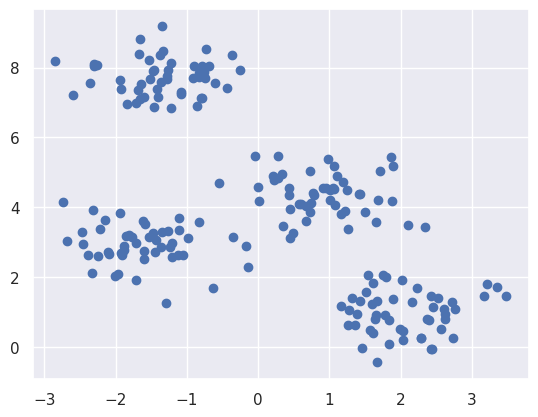

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt

# Style
sns.set()

# Generate sample data
X, y = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=0)

# Scatter plot
plt.scatter(X[:, 0], X[:, 1])
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# Create DBSCAN model
dbscancluster = DBSCAN(eps=0.4, min_samples=5)

# Fit to data (use X from make_blobs)
dbscancluster.fit(X)


DBSCAN(eps=0.4)

In [ ]:
clusters=dbscancluster.labels_

In [ ]:
from sklearn.metrics import silhouette_score

# Example: for DBSCAN
labels = dbscancluster.labels_
score = silhouette_score(X, labels)

print("Silhouette Score:", score)

Silhouette Score: 0.4225129353384709


Spam detection system:
A Spam Detection System is an intelligent classification tool that automatically identifies and filters out unwanted, irrelevant, or harmful messages from legitimate communication. The system’s primary goal is to protect users from spam, phishing attempts, and malicious content, while ensuring genuine messages are delivered without delay.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1MU8mAVsVw9g6r2ixRM69MyJOf4kODSX7mw6U39kyJz8/export?format=csv&gid=217223822'
message = pd.read_csv(url)
message

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
# Keep only the first two columns
message = message.iloc[:, :2]   # Select first two columns
message.columns = ['label', 'message']
message.head()



,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
message.shape

(5572, 5)

In [ ]:
message['label'].value_counts()

,count
label,
ham,4825
spam,747


In [ ]:
message.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    647  Please call our customer service representativ...    4

In [ ]:
 message['length']=message['message'].apply(len)

message.head()

/tmp/ipython-input-3438049320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  message['length']=message['message'].apply(len)


,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
message['length']=message['message'].apply(len)
message.head()

/tmp/ipython-input-948933428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  message['length']=message['message'].apply(len)


,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

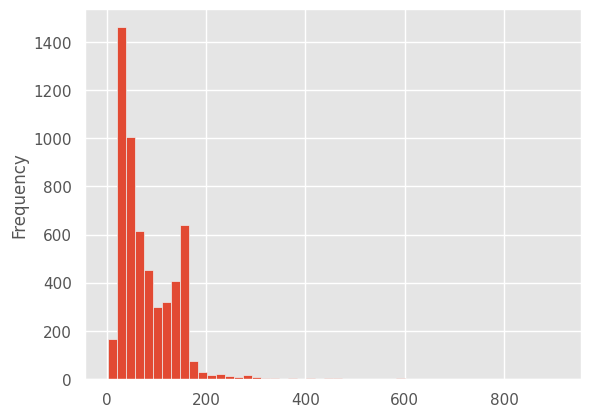

In [ ]:
message['length'].plot(bins=50,kind='hist')

In [ ]:
message.length.describe()

,length
count,5572.000000
mean,80.031945
std,59.622618
min,2.000000
25%,35.000000
50%,61.000000
75%,121.000000
max,910.000000


In [ ]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
nopunc  = [char for char in 'Go until jurong point, crazy' if char not in string.punctuation]
nopunc=''.join(nopunc)
nopunc.split()

['Go', 'until', 'jurong', 'point', 'crazy']

In [ ]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# del vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(message['tokenized_message'])

In [ ]:
message.iloc[5200]['tokenized_message']

'Call Germany 1 pence per minute Call fixed line via access number 0844 861 85 85 prepayment Direct access wwwtelediscountcouk'

In [ ]:
X.toarray()[5200]
print(vectorizer.get_feature_names_out())
message['tokenized_message'].shape

['008704050406' '0089my' '0121' ... 'zoom' 'zouk' 'zyada']


(5572,)

In [ ]:
X.toarray()[5200]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
import sys
import numpy


In [ ]:
message.iloc[4065]['tokenized_message']

'Fyi Im gonna call sporadically starting like ltgt bc doin shit'

In [ ]:
sum(X.toarray()[4065])

np.int64(10)

In [ ]:
from sklearn.model_selection import train_test_split
train_vectorized,test_vectorized,label_train,label_test = train_test_split(X,message['label'],test_size=0.2)

In [ ]:
train_vectorized

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 33678 stored elements and shape (4457, 9165)>

In [ ]:
train_array= train_vectorized.toarray()
test_array = test_vectorized.toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB
spam_detect_model = GaussianNB()
spam_detect_model.fit(train_array,label_train)

GaussianNB()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
train_preds = spam_detect_model.predict(train_array)
test_preds = spam_detect_model.predict(test_array)

In [ ]:
# Confusion matrices for train and test

print(confusion_matrix(label_train,train_preds))
print(confusion_matrix(label_test,test_preds))

[[3597  253]
 [   0  607]]
[[858 117]
 [ 10 130]]


In [ ]:
# Print the classification report for train and test
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

         ham       1.00      0.93      0.97      3850
        spam       0.71      1.00      0.83       607

    accuracy                           0.94      4457
   macro avg       0.85      0.97      0.90      4457
weighted avg       0.96      0.94      0.95      4457



              precision    recall  f1-score   support

         ham       0.99      0.88      0.93       975
        spam       0.53      0.93      0.67       140

    accuracy                           0.89      1115
   macro avg       0.76      0.90      0.80      1115
weighted avg       0.93      0.89      0.90      1115



In [ ]:
import pickle

# Load model
with open("model_filename.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Load vectorizer
with open("vectorizer_filename.pkl", "rb") as f:
    vect_model = pickle.load(f)

In [ ]:
import pickle

# Load model
with open("model_filename.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Load vectorizer
with open("vectorizer_filename.pkl", "rb") as f:
    vect_model = pickle.load(f)


In [ ]:

sent=input("enter a sentence")
X=vect_model.transform([sent])
X_dense=X.toarray()
prediction=loaded_model.predict(X_dense)
prediction

enter a sentenceyou have won a lottery


array(['spam'], dtype='<U4')